In [1]:
import os
print(os.getcwd())
os.chdir('/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/Bigdata/Python/Mini_Project/Mini_Project1[강수량 데이터 분석 및 시각화]/Data')

/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/Bigdata/Python/Mini_Project


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  

In [4]:
All = pd.read_csv('ALL.csv',encoding = 'cp949')

In [5]:
All

,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,90,속초,1968.1.1,0.0,0.0,1968.1.24,0.0,1968.1.2,-0.7,3.2,11.4,1968.1.5,-4.4,-11.4,1968.1.15
1,90,속초,1968.2.1,3.3,2.0,1968.2.29,0.0,1968.2.10,-2.1,1.9,9.7,1968.2.18,-5.4,-9.9,1968.2.1
2,90,속초,1968.3.1,8.8,3.3,1968.3.24,NaN,NaN,5.9,9.8,20.5,1968.3.31,2.1,-3.2,1968.3.3
3,90,속초,1968.4.1,6.9,3.4,1968.4.8,1.4,1968.4.5,10.5,14.4,21.4,1968.4.3,6.7,4.0,1968.4.13
4,90,속초,1968.5.1,49.1,31.8,1968.5.18,5.7,1968.5.18,14.6,17.7,24.5,1968.5.13,11.9,9.3,1968.5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49396,295,남해,2022.4.1,142.1,72.8,2022.4.26,29.0,2022.4.26,14.9,20.4,27.2,2022.4.24,10.0,5.0,2022.4.5
49397,295,남해,2022.5.1,6.7,6.0,2022.5.21,6.0,2022.5.21,19.1,24.9,30.8,2022.5.22,13.7,7.9,2022.5.2
49398,295,남해,2022.6.1,137.1,47.7,2022.6.5,17.1,2022.6.24,22.3,26.2,30.6,2022.6.22,19.2,15.1,2022.6.9
49399,295,남해,2022.7.1,236.5,77.5,2022.7.18,31.4,2022.7.11,26.4,30.3,33.0,2022.7.14,23.2,20.4,2022.7.18


# 데이터 확인

In [6]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49401 entries, 0 to 49400
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0      지점번호       49401 non-null  int64  
 1   지점명           49401 non-null  object 
 2   일시            49401 non-null  object 
 3   강수량(mm)       49021 non-null  float64
 4   일최다강수량(mm)    49021 non-null  float64
 5   일최다강수량일자      49021 non-null  object 
 6   1시간최다강수량(mm)  30939 non-null  float64
 7   1시간최다강수량일자    30939 non-null  object 
 8   평균기온(℃)       48693 non-null  float64
 9   평균최고기온(℃)     48754 non-null  float64
 10  최고기온(℃)       49157 non-null  float64
 11  최고기온일자        49157 non-null  object 
 12  평균최저기온(℃)     48754 non-null  float64
 13  최저기온(℃)       49154 non-null  float64
 14  최저기온일자        49154 non-null  object 
dtypes: float64(8), int64(1), object(6)
memory usage: 5.7+ MB


## object type을 날짜 데이터로 바꾸기

In [7]:
All['일시'] = pd.to_datetime(All['일시'])

In [8]:
All['일최다강수량일자'] = pd.to_datetime(All['일최다강수량일자'])

In [9]:
All['1시간최다강수량일자'] = pd.to_datetime(All['1시간최다강수량일자'])

In [10]:
All['최고기온일자'] = pd.to_datetime(All['최고기온일자'])

In [11]:
All['최저기온일자'] = pd.to_datetime(All['최저기온일자'])

In [12]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49401 entries, 0 to 49400
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0      지점번호       49401 non-null  int64         
 1   지점명           49401 non-null  object        
 2   일시            49401 non-null  datetime64[ns]
 3   강수량(mm)       49021 non-null  float64       
 4   일최다강수량(mm)    49021 non-null  float64       
 5   일최다강수량일자      49021 non-null  datetime64[ns]
 6   1시간최다강수량(mm)  30939 non-null  float64       
 7   1시간최다강수량일자    30939 non-null  datetime64[ns]
 8   평균기온(℃)       48693 non-null  float64       
 9   평균최고기온(℃)     48754 non-null  float64       
 10  최고기온(℃)       49157 non-null  float64       
 11  최고기온일자        49157 non-null  datetime64[ns]
 12  평균최저기온(℃)     48754 non-null  float64       
 13  최저기온(℃)       49154 non-null  float64       
 14  최저기온일자        49154 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(8), in

## 날짜 데이터 확인 현재기준(1960~2022년 8월)사이에 데이터가 있어야한다

In [13]:
All['일시'].max()

Timestamp('2022-08-01 00:00:00')

In [14]:
All['일시'].min()

Timestamp('1960-01-01 00:00:00')

In [15]:
All['일최다강수량일자'].max()

Timestamp('2022-08-03 00:00:00')

In [16]:
All['일최다강수량일자'].min()

Timestamp('1960-01-16 00:00:00')

In [17]:
All['1시간최다강수량일자'].max()

Timestamp('2022-08-03 00:00:00')

In [18]:
All['1시간최다강수량일자'].min()

Timestamp('1960-01-14 00:00:00')

# 결측값 작업

## 결측값 확인

In [19]:
# 결측치 있는지 확인
All.isnull().values.any()

True

In [20]:
# 열(컬럼)별 결측치 확인
All.isnull().any()

   지점번호         False
지점명             False
일시              False
강수량(mm)          True
일최다강수량(mm)       True
일최다강수량일자         True
1시간최다강수량(mm)     True
1시간최다강수량일자       True
평균기온(℃)          True
평균최고기온(℃)        True
최고기온(℃)          True
최고기온일자           True
평균최저기온(℃)        True
최저기온(℃)          True
최저기온일자           True
dtype: bool

## 결측값 제거

In [21]:
All['강수량(mm)'] = All['강수량(mm)'].fillna(0)

In [22]:
All['일최다강수량(mm)'] = All['일최다강수량(mm)'].fillna(0)

In [23]:
All['1시간최다강수량(mm)'] = All['1시간최다강수량(mm)'].fillna(0)

In [24]:
All['평균기온(℃)'] = All['평균기온(℃)'].fillna(0)

In [25]:
All['평균최고기온(℃)'] = All['평균최고기온(℃)'].fillna(0)

In [26]:
All['최고기온(℃)'] = All['최고기온(℃)'].fillna(0)

In [27]:
All['평균최저기온(℃)'] = All['평균최저기온(℃)'].fillna(0)

In [28]:
All['최저기온(℃)'] = All['최저기온(℃)'].fillna(0)

In [29]:
All.isnull().any()

   지점번호         False
지점명             False
일시              False
강수량(mm)         False
일최다강수량(mm)      False
일최다강수량일자         True
1시간최다강수량(mm)    False
1시간최다강수량일자       True
평균기온(℃)         False
평균최고기온(℃)       False
최고기온(℃)         False
최고기온일자           True
평균최저기온(℃)       False
최저기온(℃)         False
최저기온일자           True
dtype: bool

---

# 지점 검색

## 지점 데이터 출력

In [30]:
area = input("지역 입력(시군구) : ")
All.loc[All['지점명']==area]

지역 입력(시군구) : 밀양


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
46982,288,밀양,1972-01-01,0.0,0.0,NaT,0.0,NaT,0.0,0.0,0.0,NaT,0.0,0.0,NaT
46983,288,밀양,1973-01-01,47.5,23.3,1973-01-24,4.0,1973-01-24,2.7,7.8,12.1,1973-01-16,-1.5,-8.7,1973-01-03
46984,288,밀양,1973-02-01,28.8,9.6,1973-02-22,2.5,1973-02-22,3.4,9.0,17.2,1973-02-16,-1.9,-8.7,1973-02-25
46985,288,밀양,1973-03-01,9.1,4.4,1973-03-09,1.5,1973-03-09,6.7,13.6,23.6,1973-03-28,-0.9,-9.1,1973-03-02
46986,288,밀양,1973-04-01,162.5,72.2,1973-04-24,19.0,1973-04-24,13.4,20.2,27.8,1973-04-10,6.5,-3.8,1973-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47574,288,밀양,2022-04-01,59.6,37.5,2022-04-26,21.0,2022-04-26,15.2,22.6,30.7,2022-04-24,8.4,1.5,2022-04-02
47575,288,밀양,2022-05-01,3.3,3.3,2022-05-02,2.6,2022-05-02,20.0,27.8,33.6,2022-05-22,12.8,5.6,2022-05-02
47576,288,밀양,2022-06-01,232.8,125.6,2022-06-27,38.4,2022-06-27,23.7,29.3,35.1,2022-06-22,19.2,13.8,2022-06-09
47577,288,밀양,2022-07-01,112.8,68.3,2022-07-18,19.2,2022-07-18,27.5,32.7,36.1,2022-07-02,23.4,21.4,2022-07-16


## 지점 통계량

In [31]:
area = input('지역 입력(시군구): ')
All.loc[All['지점명']==area]['강수량(mm)'].describe()

지역 입력(시군구): 밀양


count    597.000000
mean     101.611055
std      109.346063
min        0.000000
25%       25.400000
50%       61.200000
75%      136.000000
max      695.000000
Name: 강수량(mm), dtype: float64

## 지점별 최대 강수량(상위 30지점)

In [32]:
All_P_Max = All.groupby('지점명',as_index = False)['강수량(mm)'].max().sort_values(by= '강수량(mm)', ascending=False).head(30)

## 지점별 최대 강수량 그래프(상위30지점)

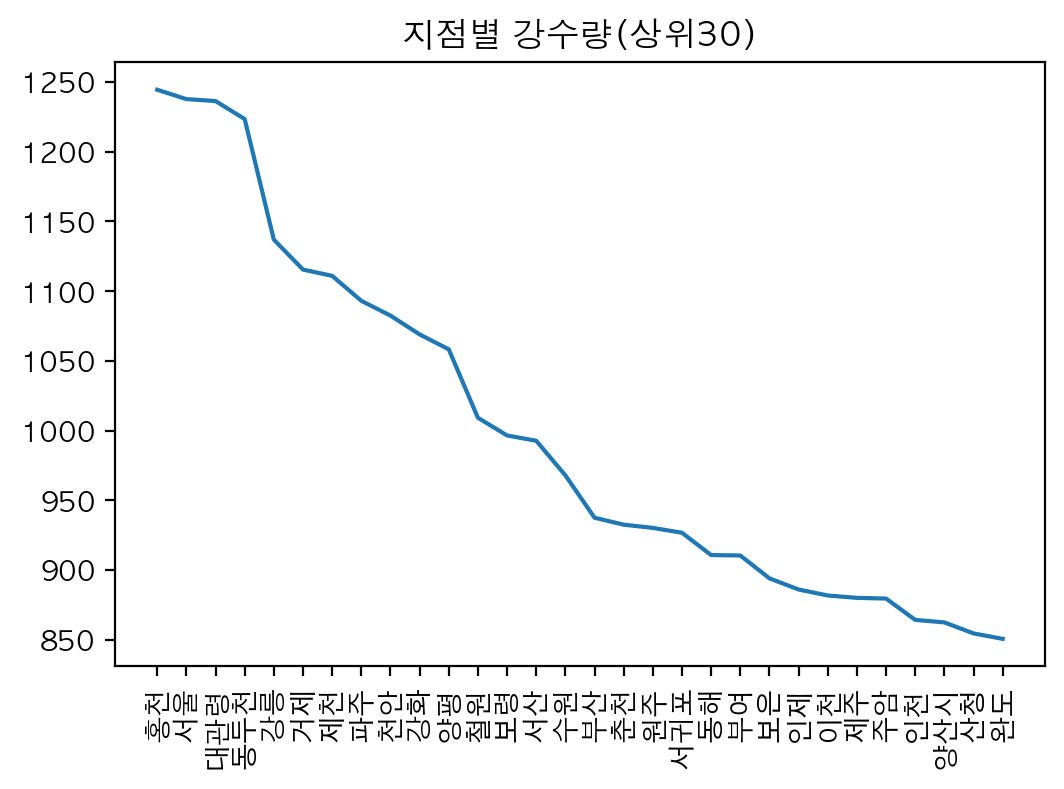

In [33]:
plt.rc('font', family = 'AppleGothic') # 그래프 글꼴
plt.figure(dpi = 200) # 그래프 크기
plt.plot(range(30),All_P_Max['강수량(mm)'])
plt.title('지점별 강수량(상위30)')
plt.xticks(range(30),All_P_Max['지점명'],rotation = 90)
plt.show()

## 지점별 최대 강수량(하위 30개 지점)

In [34]:
All_P_Min = All.groupby('지점명',as_index = False)['강수량(mm)'].max().sort_values(by = '강수량(mm)').head(30)

## 지점별 최대 강수량(하위 30개 지점)

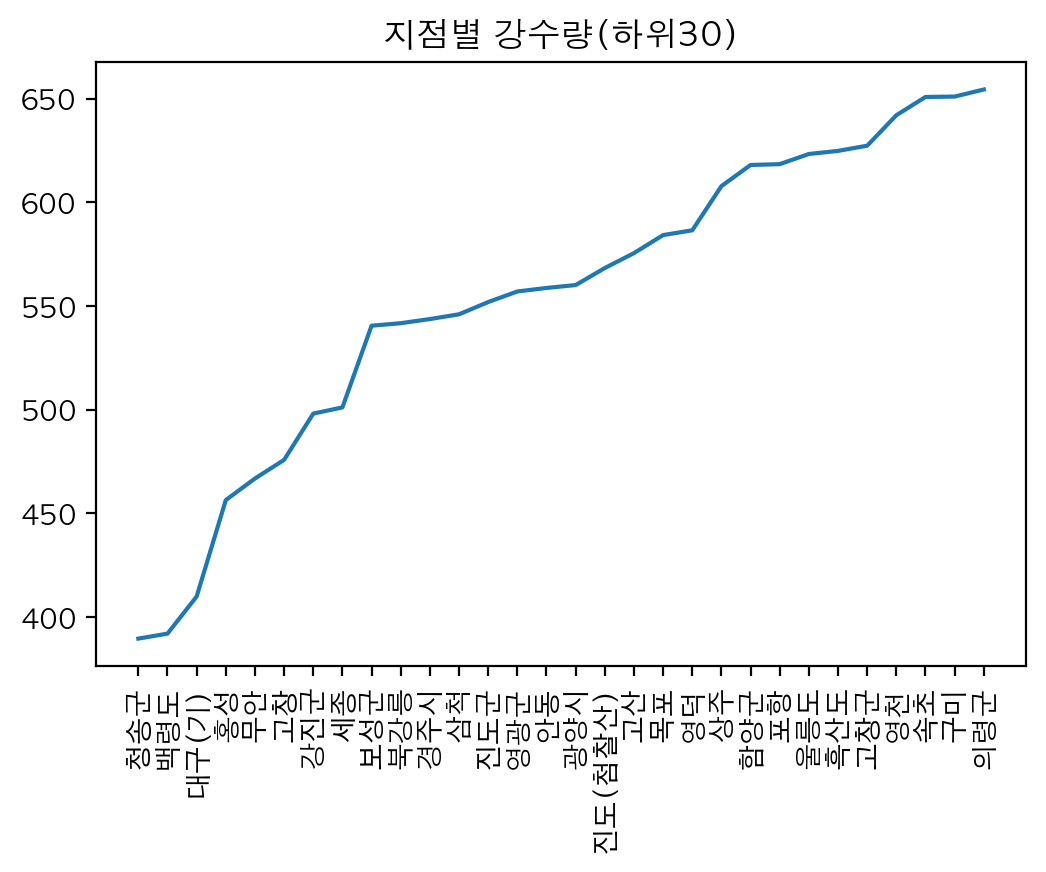

In [35]:
plt.rc('font',family = 'AppleGothic')  # 그래츠 글꼴
plt.figure(dpi= 200) # 그래프 크기
plt.plot(range(30),All_P_Min['강수량(mm)'])
plt.title('지점별 강수량(하위30)')
plt.xticks(range(30),All_P_Min['지점명'],rotation = 90)
plt.show()

## ==> 1904년~2022년까지 데이터중 최대 강수량은 서울에 제일 높고 청송이 제일 낮다
---

---
# 지역 검색

## 입력한 년도 년도별 강수량 평균

In [36]:
Point = input('지역 입력(시군구): ')
All_P = All.loc[(All['지점명'] == Point)]

지역 입력(시군구): 밀양


In [37]:
All_P_G = All_P.groupby(All_P['일시'].dt.year)['강수량(mm)']
All_P_G

## 입력한 데이터(지역) 년도별 그래프

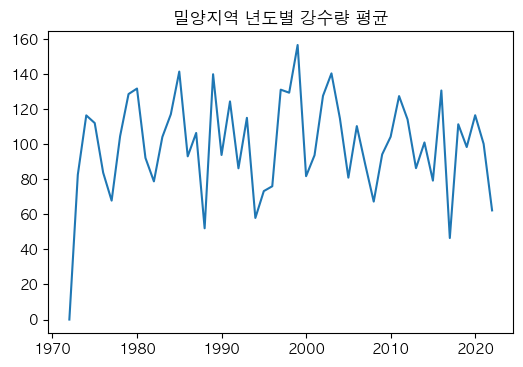

In [38]:
plt.rc('font',family = 'AppleGothic')
plt.figure(dpi = 100)
plt.title(Point+"지역 년도별 강수량 평균")
plt.plot(All_P_G.mean())
plt.show()

---
# 지역, 년도 검색

## 입력한 년도, 월별 강수량 평균

### 년도만

In [39]:
# All_P = All.groupby('지점명',as_index = False)['강수량(mm)']
# while(True):
#     A = input('지역 입력(시군구): ')
#     if (A in All['지점명']) == True :
#         area = A
#         break
#     else:
#         print('error')
Point = input('지역 입력(시군구): ')
day_y = int(input('날짜 입력 : '))
All_P_Y = All.loc[(All['지점명'] == Point) & (All['일시'].dt.year == day_y)]
All_P_Y

지역 입력(시군구): 밀양
날짜 입력 : 2021


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
47559,288,밀양,2021-01-01,16.6,14.3,2021-01-26,0.0,NaT,0.4,7.0,16.3,2021-01-15,-5.3,-14.2,2021-01-08
47560,288,밀양,2021-02-01,23.1,14.7,2021-02-01,0.0,NaT,4.3,11.7,23.7,2021-02-21,-2.4,-8.7,2021-02-18
47561,288,밀양,2021-03-01,134.3,46.6,2021-03-01,0.0,NaT,10.1,16.9,24.8,2021-03-26,3.9,-1.9,2021-03-03
47562,288,밀양,2021-04-01,66.7,28.2,2021-04-03,10.6,2021-04-04,14.0,21.2,28.4,2021-04-21,7.1,1.8,2021-04-15
47563,288,밀양,2021-05-01,107.9,28.5,2021-05-16,17.5,2021-05-28,18.2,24.5,30.6,2021-05-23,12.3,5.2,2021-05-06
47564,288,밀양,2021-06-01,68.9,24.3,2021-06-11,11.8,2021-06-23,23.2,28.7,33.3,2021-06-08,18.6,13.1,2021-06-05
47565,288,밀양,2021-07-01,308.2,87.9,2021-07-06,23.0,2021-07-07,26.7,32.5,35.9,2021-07-30,22.5,19.1,2021-07-01
47566,288,밀양,2021-08-01,302.3,121.6,2021-08-21,32.0,2021-08-21,26.2,31.3,37.8,2021-08-07,22.7,19.4,2021-08-20
47567,288,밀양,2021-09-01,60.9,19.1,2021-09-29,9.4,2021-09-29,22.7,27.4,31.4,2021-09-11,18.9,14.5,2021-09-24
47568,288,밀양,2021-10-01,61.2,40.7,2021-10-11,7.3,2021-10-11,16.5,23.4,30.8,2021-10-10,11.2,1.4,2021-10-18


In [40]:
All_P_Y_G = All_P_Y.groupby(All_P_Y['일시'].dt.month)['강수량(mm)'].mean()
All_P_Y_G.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='일시')

### 입력한 데이터( 지역, 년도) 그래프


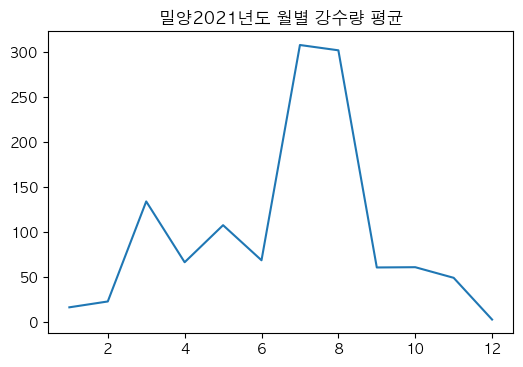

In [41]:
plt.rc('font',family = 'AppleGothic')
plt.figure(dpi = 100)
plt.title(Point+str(day_y)+"년도 월별 강수량 평균")
plt.plot(All_P_Y_G)
plt.show()

---
## 강수량 비교(지점, 년 입력) -> 월별 강수량 비교

In [42]:
area1 = input('지역 입력(시군구): ')
All_A1 = All.loc[All['지점명']==area1]
All_A1

지역 입력(시군구): 밀양


,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
46982,288,밀양,1972-01-01,0.0,0.0,NaT,0.0,NaT,0.0,0.0,0.0,NaT,0.0,0.0,NaT
46983,288,밀양,1973-01-01,47.5,23.3,1973-01-24,4.0,1973-01-24,2.7,7.8,12.1,1973-01-16,-1.5,-8.7,1973-01-03
46984,288,밀양,1973-02-01,28.8,9.6,1973-02-22,2.5,1973-02-22,3.4,9.0,17.2,1973-02-16,-1.9,-8.7,1973-02-25
46985,288,밀양,1973-03-01,9.1,4.4,1973-03-09,1.5,1973-03-09,6.7,13.6,23.6,1973-03-28,-0.9,-9.1,1973-03-02
46986,288,밀양,1973-04-01,162.5,72.2,1973-04-24,19.0,1973-04-24,13.4,20.2,27.8,1973-04-10,6.5,-3.8,1973-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47574,288,밀양,2022-04-01,59.6,37.5,2022-04-26,21.0,2022-04-26,15.2,22.6,30.7,2022-04-24,8.4,1.5,2022-04-02
47575,288,밀양,2022-05-01,3.3,3.3,2022-05-02,2.6,2022-05-02,20.0,27.8,33.6,2022-05-22,12.8,5.6,2022-05-02
47576,288,밀양,2022-06-01,232.8,125.6,2022-06-27,38.4,2022-06-27,23.7,29.3,35.1,2022-06-22,19.2,13.8,2022-06-09
47577,288,밀양,2022-07-01,112.8,68.3,2022-07-18,19.2,2022-07-18,27.5,32.7,36.1,2022-07-02,23.4,21.4,2022-07-16


In [43]:
Point1 = input('지역 입력(시군구): ')
day_y1 = int(input('날짜입력(년도) : '))
All_P_Y1 = All.loc[(All['지점명'] == Point1) & (All['일시'].dt.year == day_y1)]
print(All_P_Y1)

지역 입력(시군구): 밀양
날짜입력(년도) : 2022
          지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)   일최다강수량일자  1시간최다강수량(mm)  \
47571      288  밀양 2022-01-01      0.0         0.0 2022-01-25           0.0   
47572      288  밀양 2022-02-01      0.0         0.0 2022-02-27           0.0   
47573      288  밀양 2022-03-01     58.7        30.0 2022-03-26           0.0   
47574      288  밀양 2022-04-01     59.6        37.5 2022-04-26          21.0   
47575      288  밀양 2022-05-01      3.3         3.3 2022-05-02           2.6   
47576      288  밀양 2022-06-01    232.8       125.6 2022-06-27          38.4   
47577      288  밀양 2022-07-01    112.8        68.3 2022-07-18          19.2   
47578      288  밀양 2022-08-01     31.0        30.9 2022-08-02          19.8   

      1시간최다강수량일자  평균기온(℃)  평균최고기온(℃)  최고기온(℃)     최고기온일자  평균최저기온(℃)  최저기온(℃)  \
47571        NaT      1.0        8.4     13.6 2022-01-23       -5.0     -9.4   
47572        NaT      2.1        8.9     16.4 2022-02-28       -4.4     -9.1   
47573        NaT 

In [44]:
All_P_Y1_G = All_P_Y1.groupby(All_P_Y1['일시'].dt.month)['강수량(mm)'].mean()
I1 = All_P_Y1_G.index
All_P_Y1_G

일시
1      0.0
2      0.0
3     58.7
4     59.6
5      3.3
6    232.8
7    112.8
8     31.0
Name: 강수량(mm), dtype: float64

In [45]:
Point2 = input('지역 입력(시군구): ')
day_y2 = int(input('비교할 날짜입력(년도) : '))
All_P_Y2 = All.loc[(All['지점명'] == Point2) & (All['일시'].dt.year == day_y2)]
print(All_P_Y2)

지역 입력(시군구): 밀양
비교할 날짜입력(년도) : 2021
          지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)   일최다강수량일자  1시간최다강수량(mm)  \
47559      288  밀양 2021-01-01     16.6        14.3 2021-01-26           0.0   
47560      288  밀양 2021-02-01     23.1        14.7 2021-02-01           0.0   
47561      288  밀양 2021-03-01    134.3        46.6 2021-03-01           0.0   
47562      288  밀양 2021-04-01     66.7        28.2 2021-04-03          10.6   
47563      288  밀양 2021-05-01    107.9        28.5 2021-05-16          17.5   
47564      288  밀양 2021-06-01     68.9        24.3 2021-06-11          11.8   
47565      288  밀양 2021-07-01    308.2        87.9 2021-07-06          23.0   
47566      288  밀양 2021-08-01    302.3       121.6 2021-08-21          32.0   
47567      288  밀양 2021-09-01     60.9        19.1 2021-09-29           9.4   
47568      288  밀양 2021-10-01     61.2        40.7 2021-10-11           7.3   
47569      288  밀양 2021-11-01     49.4        29.0 2021-11-30           0.0   
47570      288  밀

In [46]:
All_P_Y2_G = All_P_Y2.groupby(All_P_Y2['일시'].dt.month)['강수량(mm)'].mean()
I2 = All_P_Y2_G.index
All_P_Y2_G 

일시
1      16.6
2      23.1
3     134.3
4      66.7
5     107.9
6      68.9
7     308.2
8     302.3
9      60.9
10     61.2
11     49.4
12      3.0
Name: 강수량(mm), dtype: float64

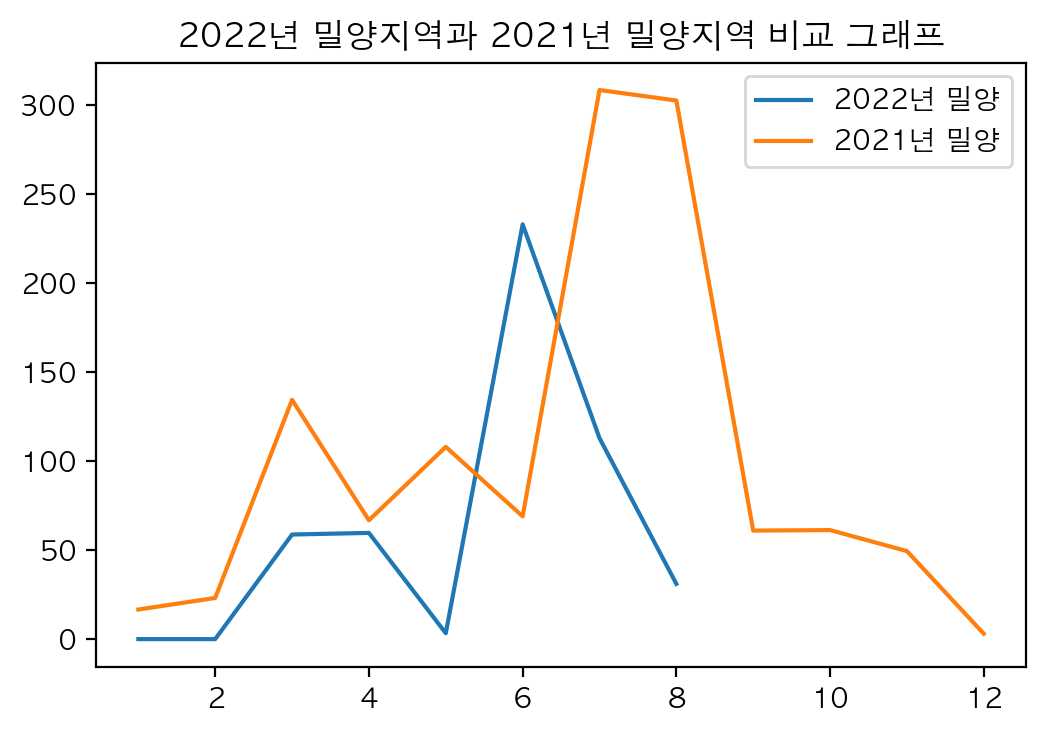

In [47]:
plt.rc('font', family='AppleGothic')
plt.figure(dpi = 200)
plt.title(str(day_y1)+"년 "+Point1+"지역과 "+str(day_y2)+"년 "+Point2+"지역"+" 비교 그래프")
plt.plot(I1,All_P_Y1_G,label = str(day_y1)+"년 "+Point1)
plt.plot(I2,All_P_Y2_G,label = str(day_y2)+"년 "+Point2)
plt.legend()
plt.show()

----